
![gog](http://r.qcbs.ca/workshop03/book-en/images/gglayers.png)

____
# ICA Wed: Visualization Technicalities

In today's ICA we will explore the grammar of graphics (GoG), which is a less well-known, but increasingly popular, paradigm for producing visualizations. 

There is no lecture today. Instead, you will watch a video _after_ you have completed the ICA. 

To keep things simple for today, since class is short, we'll stick with Altair. But, there are many other GoG libraries out there and you should explore them! If I had to suggest perhaps the most obvious library to learn after ([before?](https://www.youtube.com/watch?v=jNiQaErXg8s)) Altair, it would be Plotly; as you have seen in some of the assignments, it is very powerful. 

Anyway, let's get to it! 

We are going to walk through the steps of building a visualization **very slowly** - what might seem like ridiculously slow. But, the idea is that you appreciate how the "grammar" works. 

Your first step is to have two people in your group hook their computers to a monitor (you have two of them!) so that each group member can follow two datasets. In the first part of this ICA you will:
* read what I wrote and follow along (for the mpg dataset); put this on, say, the left monitor,
* mimic each step with a second dataset (e.g., the iris or penguin dataset - you pick one!). 

I want to be sure you know how to perform these steps for your own dataset. 


I'll use for today the "mpg" dataset and bring it in through `vega_datasets`, another place to get nice datasets. You get another dataset.

In [2]:
import altair as alt
import seaborn as sns
from vega_datasets import data
cars = data.cars()
penguins = sns.load_dataset("penguins")

We are going to start with [`.Chart`](https://altair-viz.github.io/getting_started/starting.html#the-chart-object), although Altair has [other options](https://altair-viz.github.io/user_guide/API.html#top-level-objects). The way you get started is to call Altair through `alt` (or whatever you chose to call in the `import` statement), create a chart and pass the dataframe. Note that the dataframe is the natural container for Altair (as opposed to lists, dictionaries or arrays), just as it was for Seaborn. Basically, this means Altair keeps track of the columns names and can use them.  

Run this piece of code, which will generate an error.

In [2]:
# alt.Chart(cars)
alt.Chart(penguins)


SchemaValidationError: Invalid specification

        altair.vegalite.v4.api.Chart, validating 'required'

        'mark' is a required property
        

alt.Chart(...)

In [8]:
# penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


What Altair is complaining about is that it is not possible to map the data onto a visual without knowing a minimal level of mapping. We need to use at least one more dot in the dot chain! Let's a `.mark_point` to map numbers to symbols. 

Next, run this cell:


In [7]:
# alt.Chart(cars).mark_point()
alt.Chart(penguins).mark_point()


alt.Chart(...)

What do you see? This might not look like much - a circle in a square. Seems weird, right? 

This result is expected in the GoG way of doing things: we have mapped the data onto a marker, _but have not given any more information_ about how it should be organized. Thus, we get a "0D" plot! Next time you need a 0D plot, you know how to make one!

The next "dot" that we need is an encoding (`.encode()`) that maps the markers to some geometry; that is, to an axis (or more). Let's do a simple encoding next:


In [9]:
# alt.Chart(cars).mark_point().encode(
#     x='Horsepower'
# )
alt.Chart(penguins).mark_point().encode(
    x='body_mass_g'
)

alt.Chart(...)

Gorgeous! Since we only encoded one variable to the $x$ axis, we get a 1D plot. Interestingly, this is basically a "rug plot", which we saw in Seaborn and you made in the HW. In Altair's GoG, a rug plot is a very natural type of plot. 

Do this with your dataset; compare the two monitors. 

If you want an "official" rug plot, try `mark_tick()`. 

  But, let's keep going! Let's add an encoding to the $y$ axis. 

In [24]:
# alt.Chart(cars).mark_point().encode(
#     x='Horsepower',
#     y='Miles_per_Gallon'
# )

alt.Chart(penguins).mark_point().encode(
    x='body_mass_g',
    y='flipper_length_mm'
)

alt.Chart(...)

At this point, we have a normal 2D scatter plot. Relative to `matplotlib`, the syntax looks maybe unusual; but, there is a nice logic to it. 

Let's make two jumps now, adding a color and also getting some of the true power of Altair by making the plot interactive. Again, do this with your second dataset. Here's how you do that:

In [26]:
# alt.Chart(cars).mark_point().encode(
#     x='Horsepower',
#     y='Miles_per_Gallon',
#     color='Origin',
# ).interactive()

alt.Chart(penguins).mark_point().encode(
    x='body_mass_g',
    y='flipper_length_mm',
    color='island',
).interactive()

alt.Chart(...)

What interactions can you do? Can you pan? Zoom? Save a PNG? If you double click, it returns you to the default settings. 

What if we want to do EDA on this dataset and put a categorical variable on the $x$ axis? 

Simple:

In [30]:
# alt.Chart(cars).mark_point().encode(
#     x='Origin',
#     y='Miles_per_Gallon',
#     color='Cylinders',
# ).interactive()

alt.Chart(penguins).mark_point().encode(
    x='island',
    y='flipper_length_mm',
    color='species',
).interactive()

alt.Chart(...)

Try this with the categorical variables in the second dataset as well.

What about the $y$ axis?

In [34]:
# alt.Chart(cars).mark_point().encode(
#     y='Origin',
#     x='Miles_per_Gallon',
#     color='Cylinders',
# ).interactive()

alt.Chart(penguins).mark_point().encode(
    y='island',
    x='flipper_length_mm',
    color='species:O',
).interactive()

alt.Chart(...)

Notice how the `color` option works for real values (this case) and discrete categories (the case above with `color='Origin'`). 

What does this next code do? That is, what is the ":O"? [hint](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types)

In [39]:
# alt.Chart(cars).mark_point().encode(
#     y='Origin',
#     x='Miles_per_Gallon',
#     color='Cylinders:O',
# ).interactive()

alt.Chart(penguins).mark_point().encode(
    y='island',
    x='flipper_length_mm',
    color='species:O',
).interactive()

alt.Chart(...)

What happens if you change the ":O" to ":N"? 

Again, compare and constrast the two datasets on the two monitors. 

In [38]:
alt.Chart(penguins).mark_point().encode(
    y='island',
    x='flipper_length_mm',
    color='species:N',
).interactive()

alt.Chart(...)

Ok, you get the idea: GoG is very nice for EDA!

There is a lot more to GoG, but we want to keep this fairly short. 

____

But, now it is your turn. To complete this ICA you will need to use the [Altair docs](https://altair-viz.github.io/index.html). 


Take this dataset and vary these options:
* change `mark_point` to several of the [other options](https://altair-viz.github.io/user_guide/marks.html) (e.g., bar),
* how do you change colors?
* vary the [encodings](https://altair-viz.github.io/user_guide/encoding.html),
* how do you export a PNG or PDF?
* for DS, tooltips are extremely useful - [make a plot with tooltips](https://altair-viz.github.io/gallery/scatter_tooltips.html)
* make a plot that uses [facets](https://altair-viz.github.io/user_guide/compound_charts.html),
* look through the gallery and attempt some of the styles, such as area charts, circular plots, and so on,
* discuss with your group members what their plans are for visualizations in their projects - list some examples in a markdown cell of how Altair plots might be used among your group members. (Or, are your group members planning to not use Altair at all?) 

If you like Altair and want to use it for your project, take a look at [this example](https://altair-viz.github.io/case_studies/exploring-weather.html). If you want an East Lansing weather dataset, let me know. 

In [40]:
# Trying different options
alt.Chart(penguins).mark_tick().encode(
    x='body_mass_g',
    y='flipper_length_mm',
    color='island',
).interactive()

alt.Chart(...)

In [45]:
# Assigning desired colors
dom = ['Biscoe', 'Dream', 'Torgersen']
rng = ['red', 'green', 'black']

alt.Chart(penguins).mark_tick().encode(
    x='body_mass_g',
    y='bill_length_mm',
    color=alt.Color('island', scale=alt.
                    Scale(domain=dom, range=rng))
).interactive()

alt.Chart(...)

In [47]:
# Encodings
alt.Chart(penguins).mark_point().encode(
    y='island:N',
    x='flipper_length_mm:Q',
    color='species:O',
).interactive()

alt.Chart(...)

In [48]:
alt.Chart(penguins).mark_point().encode(
    y='island:N',
    x='flipper_length_mm:Q',
    color='species:N',
).interactive()

alt.Chart(...)

In [ ]:
# Saving the plot
from base64 import encode
from importlib.resources import path
from altair_saver import save


dom = ['Biscoe', 'Dream', 'Torgersen']
rng = ['red', 'green', 'black']

chart = alt.Chart(penguins).mark_tick().encode(
    x='body_mass_g',
    y='bill_length_mm',
    color=alt.Color('island', scale=alt.
                    Scale(domain=dom, range=rng))
).interactive()


chart.save('chart.png')
chart.save('chart.pdf')

In [7]:
# Using Tooltip
alt.Chart(penguins).mark_tick().encode(
    x='body_mass_g',
    y='flipper_length_mm',
    color='island',
    tooltip = ['body_mass_g', 'flipper_length_mm']
).interactive()

alt.Chart(...)

In [10]:
# Facet plot
from altair.expr import datum
base = alt.Chart(penguins).mark_tick().encode(
    x='body_mass_g',
    y='flipper_length_mm',
    color='island:N',
).interactive()

chart = alt.hconcat()
for island in ['Biscoe', 'Dream', 'Torgersen']:
    chart |= base.transform_filter(datum.island == island)
chart

alt.HConcatChart(...)

In [11]:
# Trying different chart types
alt.Chart(penguins).mark_area().encode(
    x='body_mass_g',
    y='flipper_length_mm',
    color='island',
    tooltip = ['body_mass_g', 'flipper_length_mm']
).interactive()

alt.Chart(...)

In [12]:
alt.Chart(penguins).mark_square().encode(
    x='body_mass_g',
    y='flipper_length_mm',
    color='island',
    tooltip = ['body_mass_g', 'flipper_length_mm']
).interactive()

alt.Chart(...)

____

# Between Wed and Fri....

I didn't want to lecture Wed to give you plenty of time on the ICA. And, having done a little GoG makes it easier for you to digest the theory, rather than the other way around. At your leisure, watch this video. When you are done, feel free to look at the ICA for Fri.



____

In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/7wTIkbKaCGk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In a markdown cell, confirm that you watched the video all the way through. 


____

# ICA Friday 



In today's ICA, we will practice telling a story with data. The instructions are simple:
1. with your group, choose a dataset (just one), _[read the instructions first to be sure you pick a "good enough" dataset]_
2. each person in your group then works alone for $15$ minutes, thinking about what the dataset tells them (with **no** communication among group members),
3. based on the story you have found in the dataset, make $2-3$ visualizations,
4. present your story to the rest of the group: put your  visualizations on the monitor, and stand near the monitor and present formally to your group - this is practice for communication skills (which you will use for the projects!),
5. use good visualization practices: it's your choice, but perhaps remove spines, darken the grid, make some lines gray, use arrows, add annotations, and so on -- the choices you make should reflect the specific story you wish to tell.

Each student will likely arrive at a different narrative, even though the dataset is the same. So, each visualizations will be completely different to reflect that unique narrative. 

If you have a large group, you should think carefully about timing. You may need to use two monitors and have two subgroups presenting. 

___

In case you need a start: suppose your group picks the penguins dataset. One group member might focus on a story about the female penguins. Another might focus on the island with the most diverse penguin population. Yet another could focus on the smallest of the penguins. 

Another good dataset is the one from Wed: there are many narratives possible in the `mpg` (cars) dataset. 

Feel free to use any visualization library you wish: Plotly, Altair, matplotlib, Seaborn, etc...or any combination. 

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df_rev = pd.read_csv("tripadvisor_review.csv")
df_rev.head(5)

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic,Beaches,Theathers,Religious Institution
0,1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [31]:
df_rev.describe()

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic,Beaches,Theathers,Religious Institution
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,490.500000,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,283.045933,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,1.000000,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,245.750000,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,490.500000,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,735.250000,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,980.000000,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


## Insights
* Parks/picnics has very small standard deviation and the range of the attribute is also very small
* Maximum average rating received by resorts

In [32]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User ID                980 non-null    int64  
 1   Art Galleries          980 non-null    float64
 2   Dance Clubs            980 non-null    float64
 3   Juice Bars             980 non-null    float64
 4   Restaurants            980 non-null    float64
 5   Museums                980 non-null    float64
 6   Resorts                980 non-null    float64
 7   Parks/Picnic           980 non-null    float64
 8   Beaches                980 non-null    float64
 9   Theathers              980 non-null    float64
 10  Religious Institution  980 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 84.3 KB


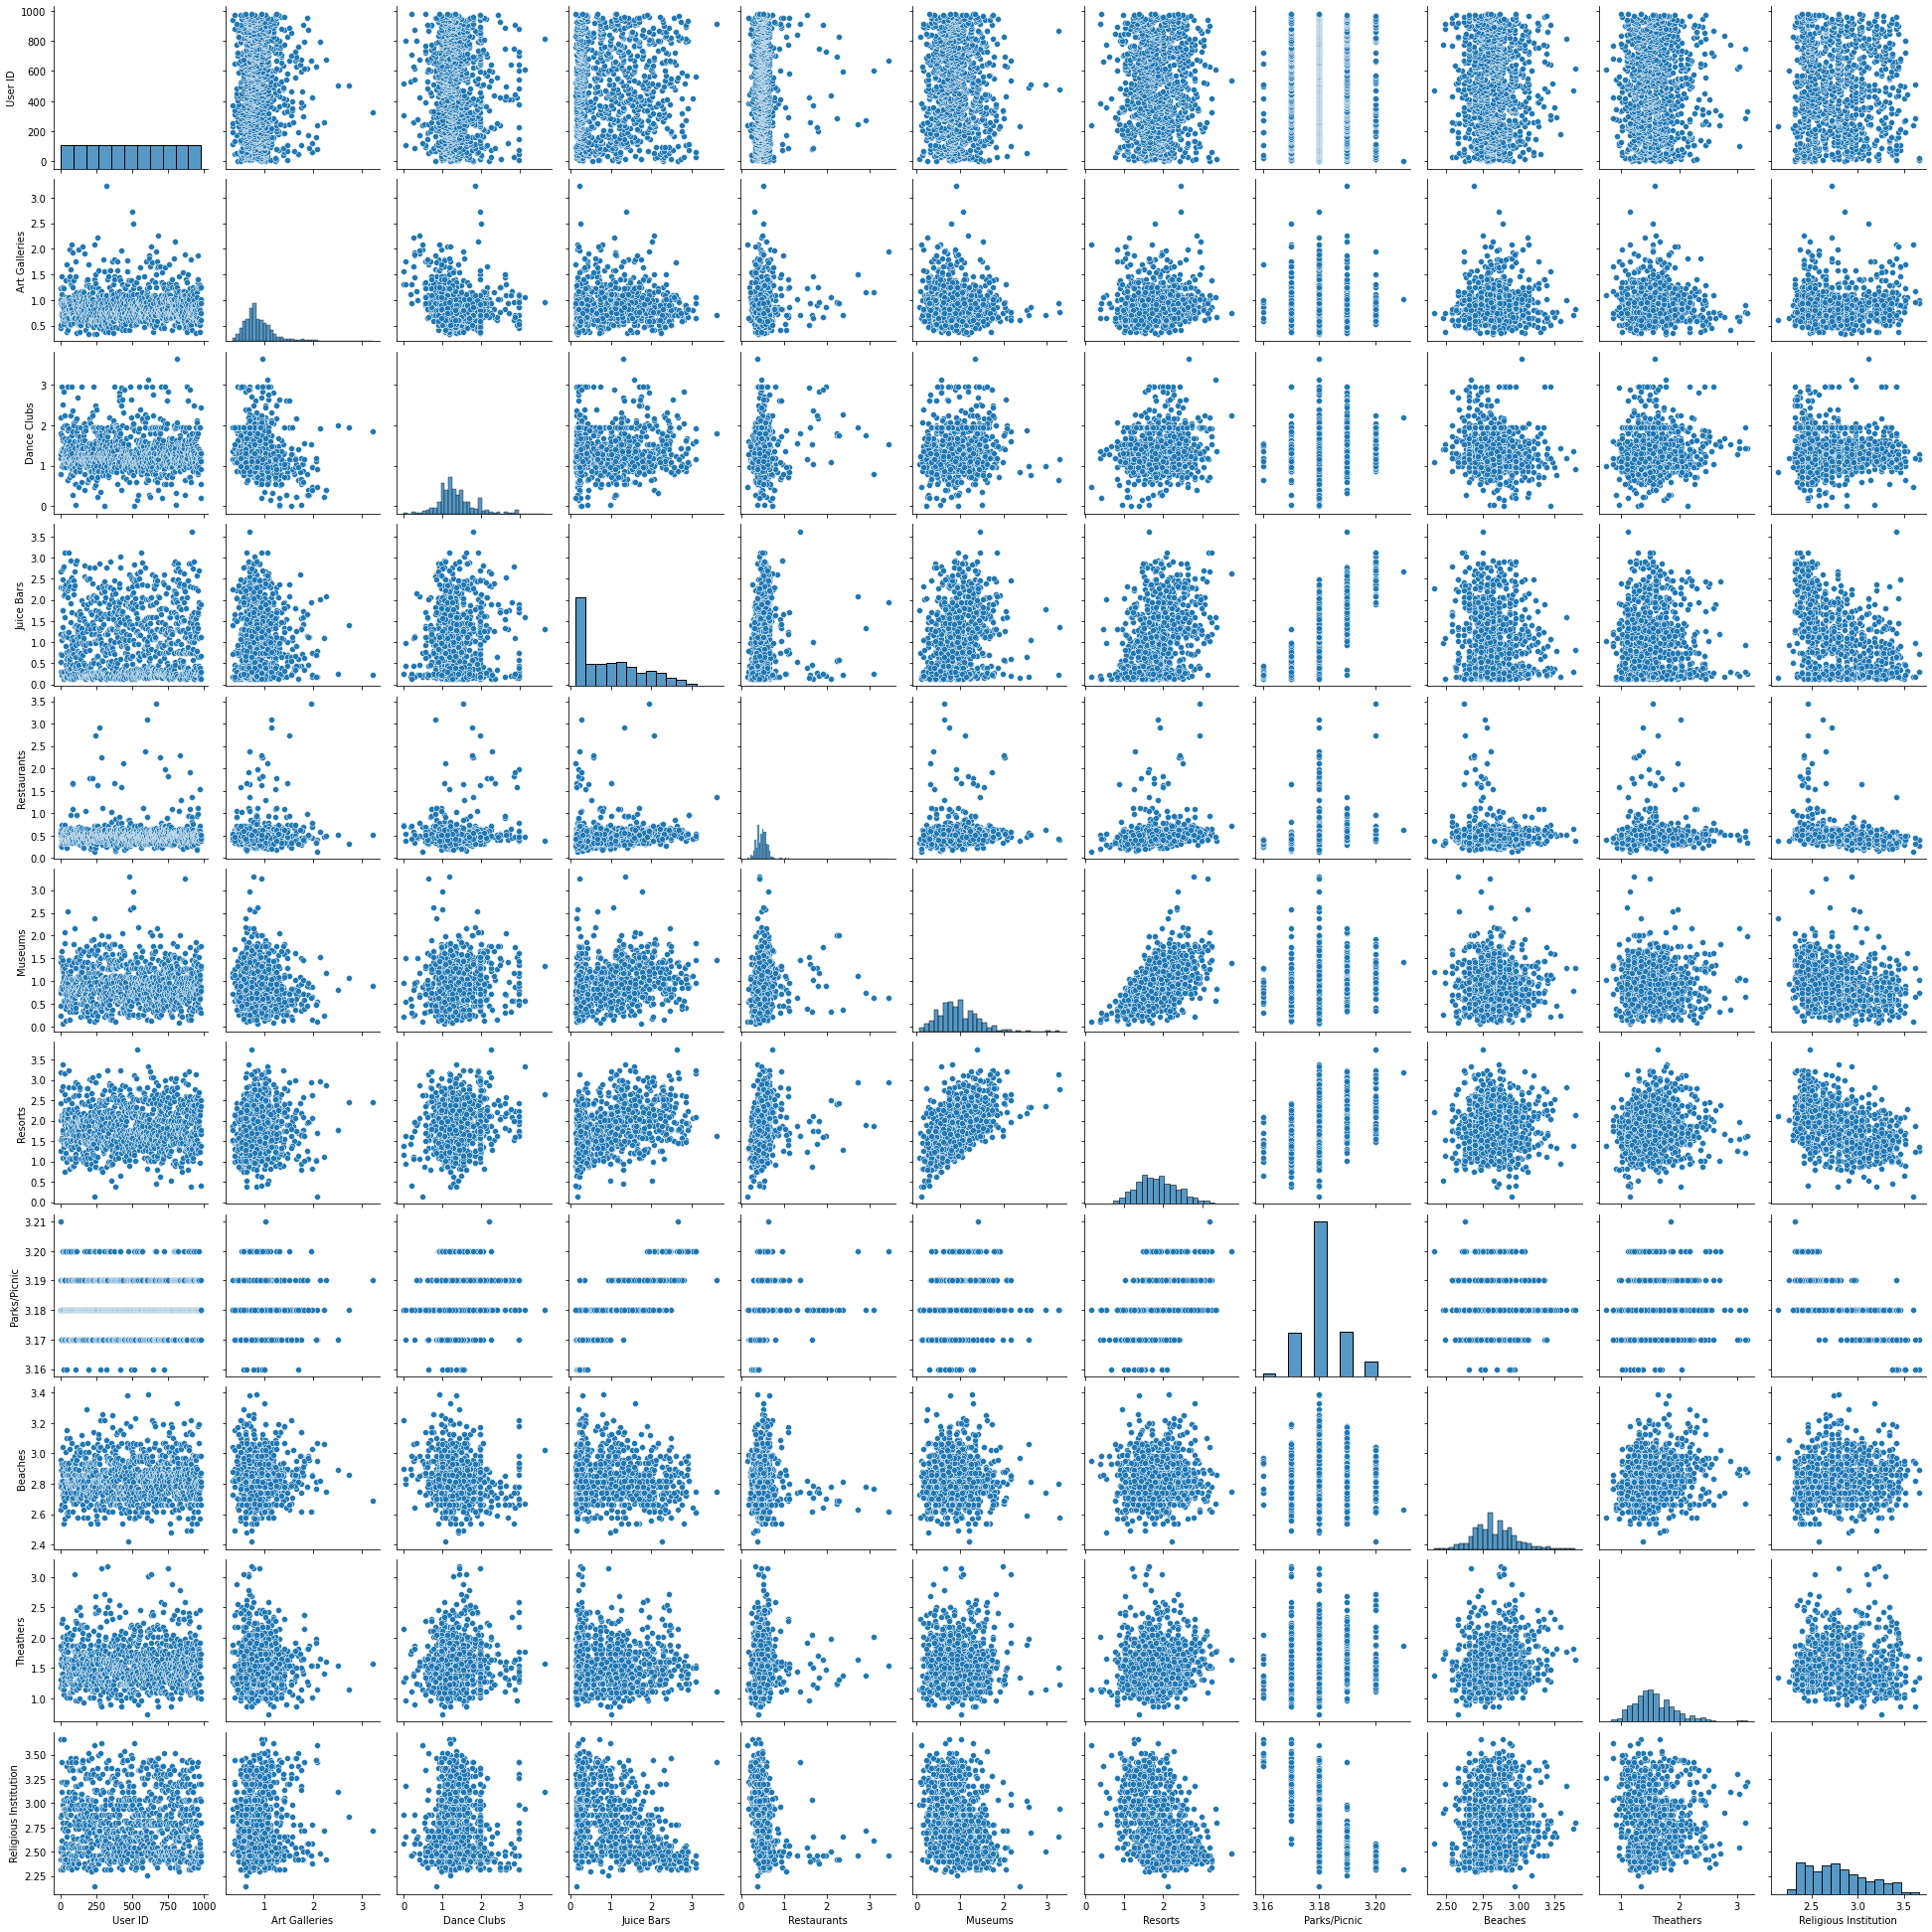

In [34]:
sns.pairplot(df_rev)

<AxesSubplot:>

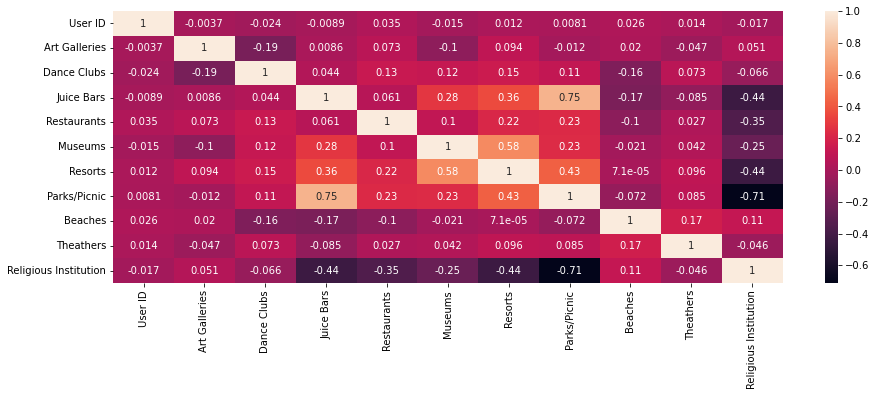

In [15]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_rev.corr(), annot= True)    

<function matplotlib.pyplot.show(close=None, block=None)>

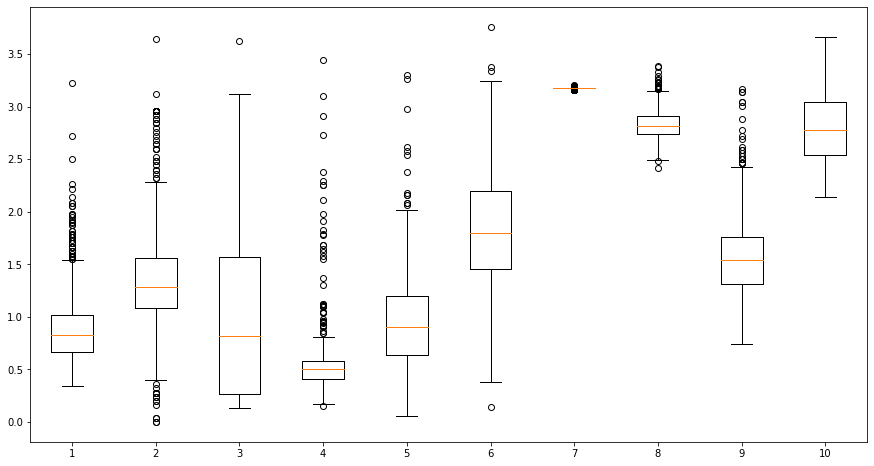

In [72]:
plt.figure(figsize=(15,8))
plt.boxplot(df_rev.drop(['User ID'], axis= 1))
plt.show

## Insights
* Strong negative correlation between parks/picnics and religious istitutions
* Some positive correlation between resorts museums and parks/picnics 
* Data has bunch of outliers in every column 

<AxesSubplot:xlabel='Parks/Picnic', ylabel='Juice Bars'>

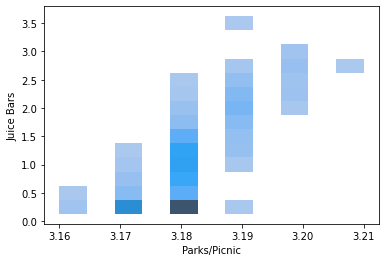

In [28]:
# Confirming our suspicion about Parks/picnic column by plotting a histplot
sns.histplot(df_rev, x= "Parks/Picnic", y="Juice Bars")

<AxesSubplot:xlabel='Resorts', ylabel='Museums'>

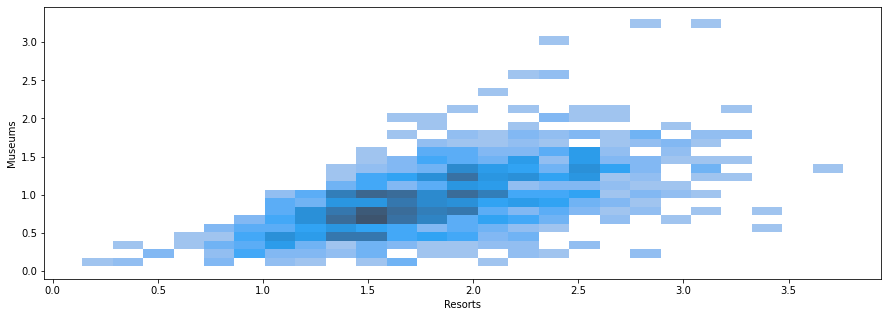

In [62]:
# Checking distribution between resorts and museums using histplot
plt.figure(figsize=(15,5))
sns.histplot(df_rev, x= "Resorts", y= "Museums")

In [59]:
alt.Chart(df_rev, title= "Positive Correlation Scatter plot Resorts Vs Museums").mark_circle().encode(
    x=alt.X('Resorts',axis=alt.Axis(tickCount=df_rev.shape[0], grid=False)),
    y=alt.Y('Museums',axis=alt.Axis(grid=False)),
    size=alt.Size('Resorts',scale=alt.Scale(range=[10,100])),
    tooltip = ['Resorts', 'Museums'],
).properties(
    width= 700,
    height= 500
).interactive()

alt.Chart(...)

<center>Thank You!